In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/pancreatitis'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from:
Zhu, Yin, Cong He, Xueyang Li, Yan Cai, Jinxiang Hu, Yuanhang Liao, Jianhua Zhao et al.

"Gut microbiota dysbiosis worsens the severity of acute pancreatitis in patients and mice."

Journal of gastroenterology 54, no. 4 (2019): 347-358.

https://doi.org/10.1007/s00535-018-1529-0

In [11]:
dat=ca.read_amplicon('./all.pancreatitis.biom',
                    './map.pancreatitis.txt',
                    min_reads=1000,
                    normalize=10000)

2022-06-26 11:44:42 INFO loaded 180 samples, 3027 features
2022-06-26 11:44:42 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-26 11:44:42 INFO After filtering, 180 remain.


In [12]:
datc=dat.cluster_features(10)

2022-06-26 11:44:43 INFO After filtering, 2082 remain.


In [13]:
humpan=datc.filter_samples('Organism','human metagenome')
humpan=humpan.cluster_features(10)

2022-06-26 11:44:44 INFO After filtering, 1208 remain.


# Compare the disease states

In [14]:
dd=humpan.diff_abundance('dx','healthy','pancreatitis',random_seed=2022)

2022-06-26 11:44:57 INFO 165 samples with both values
2022-06-26 11:44:57 INFO After filtering, 1208 remain.
2022-06-26 11:44:57 INFO 35 samples with value 1 (['healthy'])
2022-06-26 11:44:58 INFO number of higher in healthy: 296. number of higher in pancreatitis : 39. total 335


2022-06-26 11:45:01 INFO Getting dbBact annotations for 335 sequences, please wait...
2022-06-26 11:45:01 INFO Limited to maximal annotationid: 7440
2022-06-26 11:45:06 INFO got 4163 annotations
2022-06-26 11:45:06 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-26 11:45:06 INFO Got 56706 annotation-sequence pairs
2022-06-26 11:45:06 INFO Added annotation data to experiment. Total 4163 annotations, 335 ASVs
2022-06-26 11:45:06 INFO Found 1 experiments ([428]) matching current experiment - ignoring them.
2022-06-26 11:45:14 INFO found 7 negative
2022-06-26 11:45:15 INFO found 7 positive


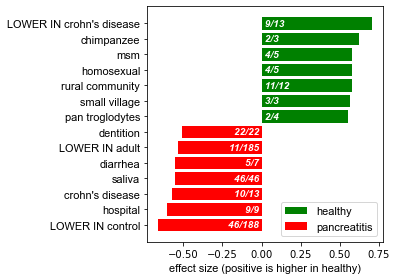

In [15]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [16]:
f.figure.savefig('./fig-terms-pancreatitis.pdf')

In [17]:
e.save('./table-terms-pancreatitis')

2022-06-26 11:45:16 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-06-26 11:45:17 INFO Found 1 experiments ([428]) matching current experiment - ignoring them.
2022-06-26 11:45:17 INFO found 40 annotations with the term ["crohn's disease"]
2022-06-26 11:45:17 INFO annotation 1920 is low
2022-06-26 11:45:17 INFO annotation 2176 is low
2022-06-26 11:45:17 INFO annotation 2830 is low
2022-06-26 11:45:17 INFO annotation 6175 is low
2022-06-26 11:45:17 INFO annotation 1956 is low
2022-06-26 11:45:17 INFO annotation 2859 is low
2022-06-26 11:45:17 INFO annotation 7085 is low
2022-06-26 11:45:17 INFO annotation 7085 is low
2022-06-26 11:45:17 INFO annotation 559 is low
2022-06-26 11:45:17 INFO annotation 2862 is low
2022-06-26 11:45:18 INFO annotation 57 is low
2022-06-26 11:45:18 INFO annotation 5817 is low
2022-06-26 11:45:18 INFO annotation 2793 is low
2022-06-26 11:45:18 INFO ignored 0 annotations


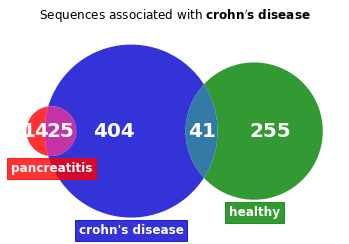

In [18]:
f=db.plot_term_venn_all("crohn's disease",dd,max_size=1000, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':20},max_id=7440)

In [19]:
f.savefig('./fig-venn-crohns-disease.pdf')

# Draw the wordclouds for the pancreatits unique sequences

In [20]:
iseqs=[]
for cseq in dd.feature_metadata.index.values:
    if cseq not in dd.databases['dbbact']['sequence_annotations']:
        print(' no annotations for %s' % cseq)
        continue
    anno=dd.databases['dbbact']['sequence_annotations'][cseq]
    bfound=0
    for cannoid in anno:
        canno=dd.databases['dbbact']['annotations'][cannoid]
        for cbterm in ["crohn's disease", 'ulcerative colitis']:
            if 'high' in canno['parents']:
                if cbterm in canno['parents']['high']:
                    bfound += 1
    if bfound == 0:
        iseqs.append(cseq)

In [21]:
len(iseqs)

285

In [22]:
rr=dd.filter_ids(iseqs)

## keep only the sequences higher in pancreatitis

In [23]:
qq=rr.filter_by_metadata('_calour_direction',['pancreatitis'],axis='f')

In [24]:
qq

AmpliconExperiment with 165 samples, 13 features

In [25]:
# remove the exp_metadata fields so add_taxonomy will work
qqq=qq.copy()
# del qqq.exp_metadata['____dbbact_term_info']
del qqq.databases['dbbact']['annotations']
del qqq.databases['dbbact']['sequence_terms']
qqq=cu.add_taxonomy(qqq)

2022-06-26 11:45:27 INFO Getting dbBact annotations for 13 sequences, please wait...
2022-06-26 11:45:28 INFO got 1484 annotations
2022-06-26 11:45:28 INFO Got 1911 annotation-sequence pairs
2022-06-26 11:45:28 INFO Added annotation data to experiment. Total 1484 annotations, 13 ASVs


In [26]:
qqq.feature_metadata.taxonomy.to_csv('pancreatitis-unique-taxa.tsv',sep='\t')

TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGTGGTTTAATAAGTCTGATGTAAAAGGCAGTGGCTCAACCATTGTGTGCATTGGAAACTGTTAGACTTGAGTGCAGTAGAGGAGAGTGGAATTCCATGT
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus
2022-06-26 11:45:35 INFO Getting dbBact annotations for 1 sequences, please wait...
2022-06-26 11:45:35 INFO got 144 annotations
2022-06-26 11:45:35 INFO Got 144 annotation-sequence pairs
TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCCGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGATACTGGGCGACTAGAATGTGGTAGAGGGTAGCGGAATTCCTGG
d__Bacteria;p__"Proteobacteria";c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Stenotrophomonas
2022-06-26 11:45:41 INFO Getting dbBact annotations for 1 sequences, please wait...
2022-06-26 11:45:41 INFO got 54 annotations
2022-06-26 11:45:41 INFO Got 54 annotation-sequence pairs
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGCTGTCT

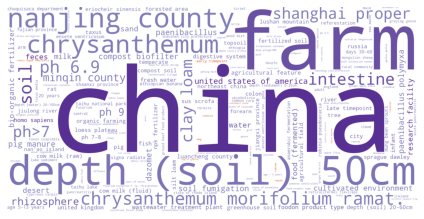

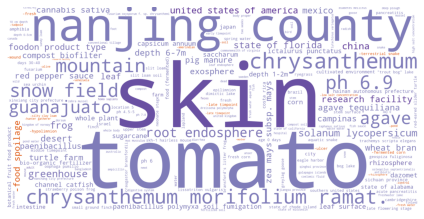

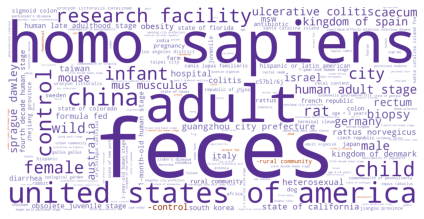

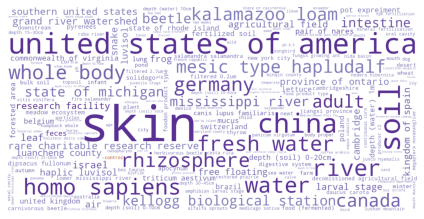

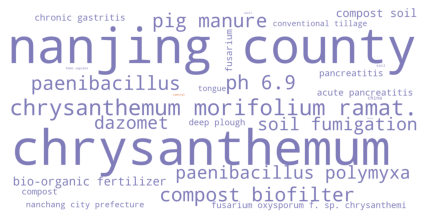

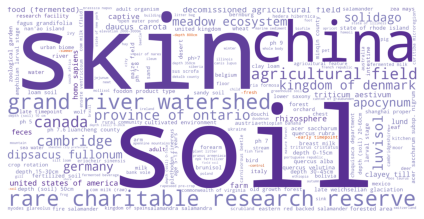

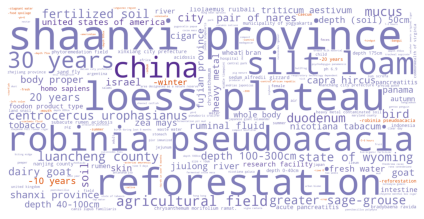

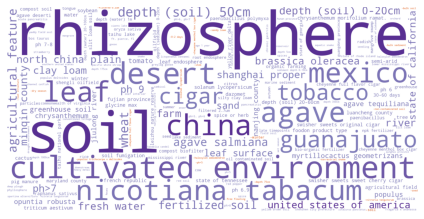

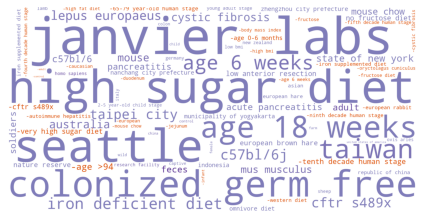

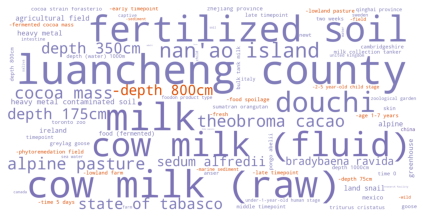

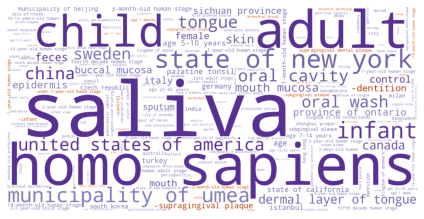

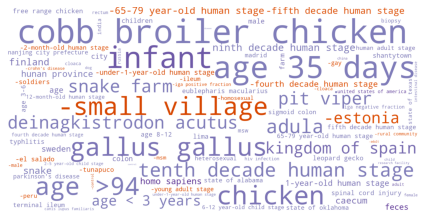

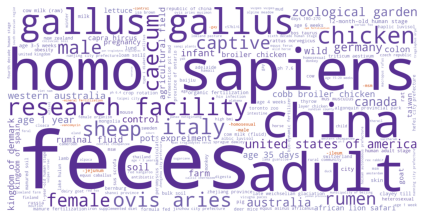

In [27]:
for idx2,(idx, cseq) in enumerate(qqq.feature_metadata.iterrows()):
    print(cseq['_feature_id'])
    print(cseq['taxonomy'])
    f=db.draw_wordcloud(features=[cseq['_feature_id']], max_id=7440)
    f.savefig('pancreatitis-wordcloud-%s-%d.pdf' % (cseq['taxonomy'].split('__')[-1], idx2),dpi=600)